In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

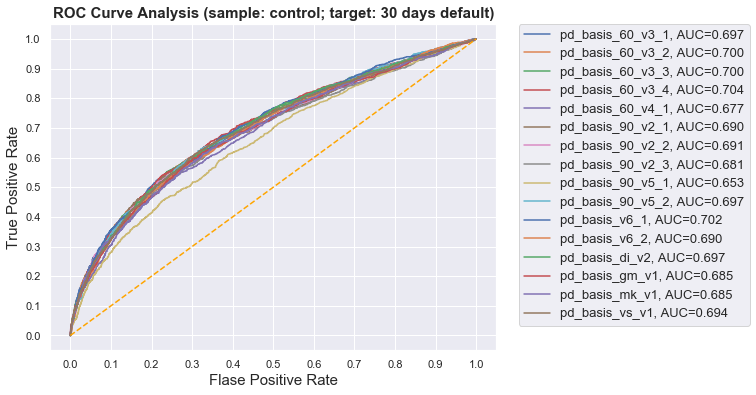

In [21]:
# ORIGINAL DATAFRAME
orig = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/v2/qiwi_exp_v2_1.csv')

# DATASET FROM QIWI
qiwi = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/v2/qiwi_exp_v2_1_results_02032021.csv')

# MERGING DATASET; REMOVING ROWS WITH NO VALUE FROM QIWI, RESETTING INDEX
df = pd.merge(orig, qiwi, left_on = 'user_id', right_on = 'ID', how = 'left')
df = df.dropna()
df = df.reset_index()

# SPLITTING DATAFRAME INTO TEST AND CONTROL
df_test = df.loc[df.group_name == 'train']
df_test = df_test.reset_index()

df_control = df.loc[df.group_name == 'test']
df_control = df_control.reset_index()

# CREATING RESULT TABLE
result_table = pd.DataFrame(columns = ['y_pred', 'fpr', 'tpr', 'auc', 'gini'])

#CALCULATE ROC-AUC SCORE FOR TEST SAMPLE
for y_pred in list(qiwi.columns)[1:]:
#     df_control = df_control.loc[df_control.target25>=0]
    fpr,tpr,_ = roc_curve(df_control['target'].to_numpy(), df_control[y_pred].to_numpy())
    auc = roc_auc_score(df_control['target'], df_control[y_pred])
    gini = 2*auc-1
    result_table = result_table.append({'y_pred':y_pred,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc,
                                        'gini':gini}, ignore_index = True)
result_table.set_index('y_pred', inplace=True)

# PLOTTING THE FIGURE
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis (sample: control; target: 30 days default)', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# # fig.savefig('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/roc_curves/control_90_days_all_scores.png',\
# #             bbox_inches = 'tight')

plt.show()

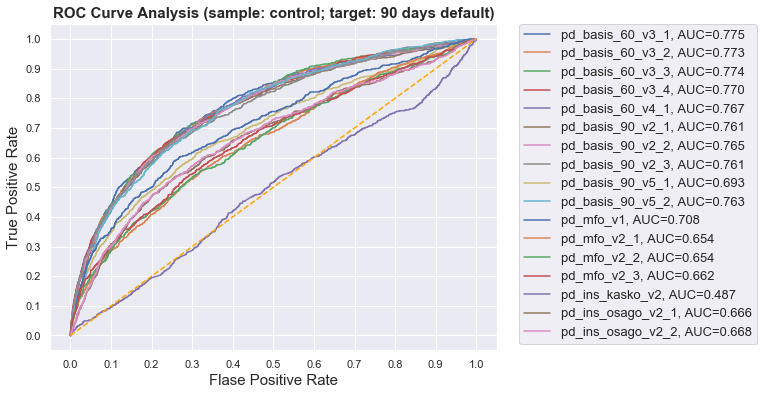

In [153]:
# ORIGINAL DATAFRAME WITH DIFFERENT TYPES OF PENALTIES
orig = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/qiwi_exp_full_by_penalty_type.csv')

# ADDING GROUP NAME
group_name = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/qiwi_exp_full.csv')
group_name = group_name[['id', 'group_name']]

# MERGING WITH THE QIWI DATASET
orig = pd.merge(orig, group_name, on = 'id', how = 'left')

# REPLACING BOOLEAN VALUES WITH NUMERICAL
orig = orig.replace(False, 0)
orig = orig.replace(True, 1)

# DATASET FROM QIWI
qiwi = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/deli_results_23112020.csv')

# MERGING DATASET; REMOVING ROWS WITH NO VALUE FROM QIWI, RESETTING INDEX
df = pd.merge(orig, qiwi, left_on = 'id', right_on = 'ID', how = 'left')
df = df.dropna()
df = df.reset_index()

# SPLITTING DATAFRAME INTO TEST AND CONTROL
df_test = df.loc[df.group_name == 'test']
df_test = df_test.reset_index()

df_control = df.loc[df.group_name == 'control']
df_control = df_control.reset_index()

# CREATING RESULT TABLE
result_table = pd.DataFrame(columns = ['y_pred', 'fpr', 'tpr', 'auc', 'gini'])

#CALCULATE ROC-AUC SCORE FOR TEST SAMPLE
for y_pred in list(qiwi.columns)[1:]:
    fpr,tpr,_ = roc_curve(df_control['target_5_def_90days'].to_numpy(), df_control[y_pred].to_numpy())
    auc = roc_auc_score(df_control['target_5_def_90days'], df_control[y_pred])
    gini = 2*auc-1
    result_table = result_table.append({'y_pred':y_pred,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc,
                                        'gini':gini}, ignore_index = True)
result_table.set_index('y_pred', inplace=True)

# PLOTTING THE FIGURE
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis (sample: control; target: 90 days default)', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# fig.savefig('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/roc_curves/control_acc_def_90_days_all_scores.png',\
#             bbox_inches = 'tight')

plt.show()

## ANALYZING CREDIT SCORE PERFORMANCE AS A PREDICTOR

## DATADEV

In [149]:
dd = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/datadev/DataDev_credit_score.csv')
vals = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/qiwi_vs_dd/dd_user_values.csv')
dd = dd.merge(vals, left_on = 'applicationNumber', right_on = 'id', how = 'left')
dd = dd[dd.scoreNumber_7 != 0]
results = []
for i in sorted(dd.scoreNumber_7.unique()):
    dd['pred'] = np.where(dd.scoreNumber_7 <= i, 1, 0)
    dd['category'] = np.where((dd.target_4_def_90_days == True)&(dd.pred == 1), 'TP', np.where((dd.target_4_def_90_days == True)&(dd.pred == 0), 'FN',\
                 np.where((dd.target_4_def_90_days == False)&(dd.pred == 0), 'TN', np.where((dd.target_4_def_90_days == False)&(dd.pred == 1), 'FP', 'NA'))))
    dd_grpd = dd[['category', 'pred', 'LTV', 'avg_loss', 'avg_ltv']]
    grpd = dd_grpd.groupby('category').count()
    grpd_mean = dd_grpd.groupby('category').mean()
    if len(grpd.pred) == 4:
        results.append([\
                        i,\
                        grpd.loc['FP', :][0], grpd_mean.loc['FP', 'LTV'],\
                        grpd.loc['TN', :][0], grpd_mean.loc['TN', 'LTV'],\
                        grpd.loc['FN', :][0], grpd_mean.loc['FN', 'LTV'],\
                        grpd.loc['TP', :][0], grpd_mean.loc['TP', 'LTV'],\
                        roc_auc_score(dd['target_4_def_90_days'], dd.pred),\
                        dd.loc[0, 'avg_ltv'],\
                        dd.loc[0, 'avg_loss']])
        print(i, roc_auc_score(dd['target_4_def_90_days'], dd.pred),\
              'FP: ' + str(grpd.loc['FP', :][0]), 'TN: ' + str(grpd.loc['TN', :][0]),\
              'FPR: ' + str(grpd.loc['FP', :][0]/(grpd.loc['FP', :][0] + grpd.loc['TN', :][0])),\
              'FN: ' + str(grpd.loc['FN', :][0]), 'TP: ' + str(grpd.loc['TP', :][0]),\
              'FNR: ' + str(grpd.loc['FN', :][0]/(grpd.loc['FN', :][0] + grpd.loc['TP', :][0])))

        
        
    else:
        print(i, roc_auc_score(dd['target_4_def_90_days'], dd.pred))

-111 0.6752401354349322 FP: 959 TN: 6617 FPR: 0.12658394931362196 FN: 114 TP: 104 FNR: 0.5229357798165137
346 0.6751741375468646 FP: 960 TN: 6616 FPR: 0.12671594508975711 FN: 114 TP: 104 FNR: 0.5229357798165137
354 0.675108139658797 FP: 961 TN: 6615 FPR: 0.1268479408658923 FN: 114 TP: 104 FNR: 0.5229357798165137
377 0.6750421417707294 FP: 962 TN: 6614 FPR: 0.12697993664202745 FN: 114 TP: 104 FNR: 0.5229357798165137
380 0.6749761438826618 FP: 963 TN: 6613 FPR: 0.12711193241816263 FN: 114 TP: 104 FNR: 0.5229357798165137
388 0.6749101459945943 FP: 964 TN: 6612 FPR: 0.12724392819429778 FN: 114 TP: 104 FNR: 0.5229357798165137
390 0.6748441481065267 FP: 965 TN: 6611 FPR: 0.12737592397043296 FN: 114 TP: 104 FNR: 0.5229357798165137
415 0.6747781502184591 FP: 966 TN: 6610 FPR: 0.1275079197465681 FN: 114 TP: 104 FNR: 0.5229357798165137
422 0.6770717282001105 FP: 966 TN: 6610 FPR: 0.1275079197465681 FN: 113 TP: 105 FNR: 0.518348623853211
427 0.6770057303120429 FP: 967 TN: 6609 FPR: 0.127639915522

566 0.6833094368503143 FP: 1080 TN: 6496 FPR: 0.14255543822597677 FN: 107 TP: 111 FNR: 0.4908256880733945
567 0.6831114431861116 FP: 1083 TN: 6493 FPR: 0.14295142555438226 FN: 107 TP: 111 FNR: 0.4908256880733945
568 0.6829794474099764 FP: 1085 TN: 6491 FPR: 0.1432154171066526 FN: 107 TP: 111 FNR: 0.4908256880733945
569 0.6829134495219089 FP: 1086 TN: 6490 FPR: 0.14334741288278774 FN: 107 TP: 111 FNR: 0.4908256880733945
570 0.6827154558577061 FP: 1089 TN: 6487 FPR: 0.14374340021119325 FN: 107 TP: 111 FNR: 0.4908256880733945
571 0.6826494579696385 FP: 1090 TN: 6486 FPR: 0.1438753959873284 FN: 107 TP: 111 FNR: 0.4908256880733945
572 0.6825174621935033 FP: 1092 TN: 6484 FPR: 0.14413938753959873 FN: 107 TP: 111 FNR: 0.4908256880733945
573 0.6824514643054358 FP: 1093 TN: 6483 FPR: 0.1442713833157339 FN: 107 TP: 111 FNR: 0.4908256880733945
574 0.682253470641233 FP: 1096 TN: 6480 FPR: 0.1446673706441394 FN: 107 TP: 111 FNR: 0.4908256880733945
576 0.6821874727531655 FP: 1097 TN: 6479 FPR: 0.144

651 0.6937389196206271 FP: 1339 TN: 6237 FPR: 0.17674234424498417 FN: 95 TP: 123 FNR: 0.43577981651376146
652 0.6936729217325595 FP: 1340 TN: 6236 FPR: 0.17687434002111932 FN: 95 TP: 123 FNR: 0.43577981651376146
653 0.6933429322922215 FP: 1345 TN: 6231 FPR: 0.17753431890179514 FN: 95 TP: 123 FNR: 0.43577981651376146
654 0.6952405229454678 FP: 1351 TN: 6225 FPR: 0.17832629355860613 FN: 94 TP: 124 FNR: 0.43119266055045874
655 0.6949105335051298 FP: 1356 TN: 6220 FPR: 0.17898627243928195 FN: 94 TP: 124 FNR: 0.43119266055045874
656 0.694712539840927 FP: 1359 TN: 6217 FPR: 0.17938225976768743 FN: 94 TP: 124 FNR: 0.43119266055045874
657 0.6943825504005892 FP: 1364 TN: 6212 FPR: 0.18004223864836325 FN: 94 TP: 124 FNR: 0.43119266055045874
658 0.6940525609602511 FP: 1369 TN: 6207 FPR: 0.18070221752903906 FN: 94 TP: 124 FNR: 0.43119266055045874
659 0.6959501516134969 FP: 1375 TN: 6201 FPR: 0.18149419218585006 FN: 93 TP: 125 FNR: 0.42660550458715596
660 0.695620162173159 FP: 1380 TN: 6196 FPR: 0.

739 0.7099283832091685 FP: 1893 TN: 5683 FPR: 0.24986800422386485 FN: 72 TP: 146 FNR: 0.3302752293577982
740 0.709532395880763 FP: 1899 TN: 5677 FPR: 0.2506599788806758 FN: 72 TP: 146 FNR: 0.3302752293577982
741 0.7091364085523575 FP: 1905 TN: 5671 FPR: 0.2514519535374868 FN: 72 TP: 146 FNR: 0.3302752293577982
742 0.7105060161010628 FP: 1919 TN: 5657 FPR: 0.2532998944033791 FN: 71 TP: 147 FNR: 0.3256880733944954
743 0.7101100287726573 FP: 1925 TN: 5651 FPR: 0.2540918690601901 FN: 71 TP: 147 FNR: 0.3256880733944954
744 0.7117436278736328 FP: 1935 TN: 5641 FPR: 0.25541182682154173 FN: 70 TP: 148 FNR: 0.3211009174311927
745 0.7109516532168219 FP: 1947 TN: 5629 FPR: 0.25699577613516367 FN: 70 TP: 148 FNR: 0.3211009174311927
746 0.709829689119673 FP: 1964 TN: 5612 FPR: 0.2592397043294615 FN: 70 TP: 148 FNR: 0.3211009174311927
747 0.7113972903325809 FP: 1975 TN: 5601 FPR: 0.26069165786694826 FN: 69 TP: 149 FNR: 0.3165137614678899
748 0.7105393177877023 FP: 1988 TN: 5588 FPR: 0.26240760295670

818 0.7137441510128556 FP: 2843 TN: 4733 FPR: 0.3752639915522703 FN: 43 TP: 175 FNR: 0.19724770642201836
819 0.7149817627854257 FP: 2859 TN: 4717 FPR: 0.37737592397043296 FN: 42 TP: 176 FNR: 0.1926605504587156
820 0.713991794464412 FP: 2874 TN: 4702 FPR: 0.3793558606124604 FN: 42 TP: 176 FNR: 0.1926605504587156
821 0.7133978134718038 FP: 2883 TN: 4693 FPR: 0.3805438225976769 FN: 42 TP: 176 FNR: 0.1926605504587156
822 0.7121438535985197 FP: 2902 TN: 4674 FPR: 0.383051742344245 FN: 42 TP: 176 FNR: 0.1926605504587156
823 0.711153885277506 FP: 2917 TN: 4659 FPR: 0.38503167898627244 FN: 42 TP: 176 FNR: 0.1926605504587156
824 0.7102959127326274 FP: 2930 TN: 4646 FPR: 0.3867476240760296 FN: 42 TP: 176 FNR: 0.1926605504587156
825 0.7093719422996813 FP: 2944 TN: 4632 FPR: 0.3885955649419219 FN: 42 TP: 176 FNR: 0.1926605504587156
826 0.7078539908741269 FP: 2967 TN: 4609 FPR: 0.3916314677930306 FN: 42 TP: 176 FNR: 0.1926605504587156
827 0.7066660288889105 FP: 2985 TN: 4591 FPR: 0.3940073917634635

898 0.6880588628503338 FP: 4240 TN: 3336 FPR: 0.5596620908130939 FN: 14 TP: 204 FNR: 0.06422018348623854
899 0.6866729072009146 FP: 4261 TN: 3315 FPR: 0.5624340021119324 FN: 14 TP: 204 FNR: 0.06422018348623854
900 0.6857489367679683 FP: 4275 TN: 3301 FPR: 0.5642819429778247 FN: 14 TP: 204 FNR: 0.06422018348623854
901 0.6889501370818518 FP: 4296 TN: 3280 FPR: 0.5670538542766631 FN: 12 TP: 206 FNR: 0.05504587155963303
902 0.6874321856562975 FP: 4319 TN: 3257 FPR: 0.5700897571277719 FN: 12 TP: 206 FNR: 0.05504587155963303
903 0.6864422173352838 FP: 4334 TN: 3242 FPR: 0.5720696937697993 FN: 12 TP: 206 FNR: 0.05504587155963303
904 0.6855182469023376 FP: 4348 TN: 3228 FPR: 0.5739176346356917 FN: 12 TP: 206 FNR: 0.05504587155963303
905 0.6845282785813239 FP: 4363 TN: 3213 FPR: 0.5758975712777191 FN: 12 TP: 206 FNR: 0.05504587155963303
906 0.6825483419392964 FP: 4393 TN: 3183 FPR: 0.579857444561774 FN: 12 TP: 206 FNR: 0.05504587155963303
907 0.6831259748311906 FP: 4419 TN: 3157 FPR: 0.58328933

986 0.6140770467822094 FP: 5778 TN: 1798 FPR: 0.7626715945089757 FN: 2 TP: 216 FNR: 0.009174311926605505
987 0.6127570890208578 FP: 5798 TN: 1778 FPR: 0.765311510031679 FN: 2 TP: 216 FNR: 0.009174311926605505
988 0.612097110140182 FP: 5808 TN: 1768 FPR: 0.7666314677930306 FN: 2 TP: 216 FNR: 0.009174311926605505
989 0.6109091481549656 FP: 5826 TN: 1750 FPR: 0.7690073917634636 FN: 2 TP: 216 FNR: 0.009174311926605505
990 0.6099851777220193 FP: 5840 TN: 1736 FPR: 0.7708553326293559 FN: 2 TP: 216 FNR: 0.009174311926605505
991 0.6093251988413435 FP: 5850 TN: 1726 FPR: 0.7721752903907075 FN: 2 TP: 216 FNR: 0.009174311926605505
992 0.6084012284083974 FP: 5864 TN: 1712 FPR: 0.7740232312565998 FN: 2 TP: 216 FNR: 0.009174311926605505
993 0.6058273107737617 FP: 5903 TN: 1673 FPR: 0.7791710665258712 FN: 2 TP: 216 FNR: 0.009174311926605505
994 0.6043753572362749 FP: 5925 TN: 1651 FPR: 0.7820749736008448 FN: 2 TP: 216 FNR: 0.009174311926605505
995 0.6036493804675315 FP: 5936 TN: 1640 FPR: 0.783526927

1068 0.5405553994749233 FP: 6892 TN: 684 FPR: 0.909714889123548 FN: 2 TP: 216 FNR: 0.009174311926605505
1069 0.5401594121465177 FP: 6898 TN: 678 FPR: 0.910506863780359 FN: 2 TP: 216 FNR: 0.009174311926605505
1070 0.5400274163703827 FP: 6900 TN: 676 FPR: 0.9107708553326294 FN: 2 TP: 216 FNR: 0.009174311926605505
1071 0.5396974269300447 FP: 6905 TN: 671 FPR: 0.9114308342133052 FN: 2 TP: 216 FNR: 0.009174311926605505
1072 0.5390374480493689 FP: 6915 TN: 661 FPR: 0.9127507919746568 FN: 2 TP: 216 FNR: 0.009174311926605505
1073 0.5378494860641524 FP: 6933 TN: 643 FPR: 0.9151267159450898 FN: 2 TP: 216 FNR: 0.009174311926605505
1074 0.5375194966238145 FP: 6938 TN: 638 FPR: 0.9157866948257656 FN: 2 TP: 216 FNR: 0.009174311926605505
1075 0.5392190936128576 FP: 6947 TN: 629 FPR: 0.916974656810982 FN: 1 TP: 217 FNR: 0.0045871559633027525
1076 0.5386251126202494 FP: 6956 TN: 620 FPR: 0.9181626187961985 FN: 1 TP: 217 FNR: 0.0045871559633027525
1077 0.5366451759782219 FP: 6986 TN: 590 FPR: 0.92212249

1173 0.5031019007391764
1174 0.5030359028511088
1176 0.5026399155227033
1178 0.5025739176346358
1180 0.502507919746568
1182 0.5024419218585006
1183 0.5023099260823654
1185 0.5019799366420274
1188 0.5013199577613516
1190 0.501253959873284
1192 0.5011219640971489
1196 0.5009239704329461
1199 0.5007259767687434
1202 0.5005939809926082
1203 0.5005279831045406
1204 0.5004619852164731
1208 0.5003299894403379
1212 0.5001979936642027
1228 0.5001319957761352
1229 0.5000659978880676
1245 0.5


## QIWI

In [168]:
dd = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/datadev/DataDev_credit_score.csv')
vals = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/qiwi_vs_dd/dd_user_values.csv')
dd = dd.merge(vals, left_on = 'applicationNumber', right_on = 'id', how = 'left')
dd = dd[dd.scoreNumber_7 != 0]
dd = dd[['applicationNumber', 'target_4_def_90_days']+list(vals.columns)]
qiwi = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/deli_results_23112020.csv')
qiwi = qiwi[['ID', 'pd_basis_60_v3_4']]
ddq = dd.merge(qiwi, left_on = 'applicationNumber', right_on = 'ID', how = 'left')

results = []
for i in range(int(ddq.pd_basis_60_v3_4.min()*500), int(ddq.pd_basis_60_v3_4.max()*500)):
    ddq['pred'] = np.where(ddq.pd_basis_60_v3_4 >= i/500, 1, 0)
    ddq['category'] = np.where((ddq.target_4_def_90_days == True)&(ddq.pred == 1), 'TP', np.where((ddq.target_4_def_90_days == True)&(ddq.pred == 0), 'FN',\
                 np.where((ddq.target_4_def_90_days == False)&(ddq.pred == 0), 'TN', np.where((ddq.target_4_def_90_days == False)&(ddq.pred == 1), 'FP', 'NA'))))
    ddq_grpd = ddq[['category', 'pred', 'LTV', 'avg_loss', 'avg_ltv']]
    grpd = ddq_grpd.groupby('category').count()
    grpd_mean = ddq_grpd.groupby('category').mean()
    if len(grpd.pred) == 4:
        results.append([\
                        i/500,\
                        grpd.loc['FP', :][0], grpd_mean.loc['FP', 'LTV'],\
                        grpd.loc['TN', :][0], grpd_mean.loc['TN', 'LTV'],\
                        grpd.loc['FN', :][0], grpd_mean.loc['FN', 'LTV'],\
                        grpd.loc['TP', :][0], grpd_mean.loc['TP', 'LTV'],\
                        roc_auc_score(ddq['target_4_def_90_days'], ddq.pred),\
                        ddq.loc[0, 'avg_ltv'],\
                        ddq.loc[0, 'avg_loss']])
        print(i/500, roc_auc_score(ddq['target_4_def_90_days'], ddq.pred),\
              'FP: ' + str(grpd.loc['FP', :][0]), 'TN: ' + str(grpd.loc['TN', :][0]),\
              'FPR: ' + str(grpd.loc['FP', :][0]/(grpd.loc['FP', :][0] + grpd.loc['TN', :][0])),\
              'FN: ' + str(grpd.loc['FN', :][0]), 'TP: ' + str(grpd.loc['TP', :][0]),\
              'FNR: ' + str(grpd.loc['FN', :][0]/(grpd.loc['FN', :][0] + grpd.loc['TP', :][0])))

        
        
    else:
        print(i/500, roc_auc_score(ddq['target_4_def_90_days'], ddq.pred))

0.0 0.5
0.002 0.5017159450897571
0.004 0.5220426891293607 FP: 7103 TN: 473 FPR: 0.9375659978880676 FN: 4 TP: 214 FNR: 0.01834862385321101
0.006 0.5591661984247698 FP: 6471 TN: 1105 FPR: 0.8541446673706441 FN: 6 TP: 212 FNR: 0.027522935779816515
0.008 0.5917188998575899 FP: 5804 TN: 1772 FPR: 0.76610348468849 FN: 11 TP: 207 FNR: 0.05045871559633028
0.01 0.6259378965928136 FP: 5077 TN: 2499 FPR: 0.670142555438226 FN: 17 TP: 201 FNR: 0.0779816513761468
0.012 0.6548770622826308 FP: 4430 TN: 3146 FPR: 0.584741288278775 FN: 23 TP: 195 FNR: 0.10550458715596331
0.014 0.674510525754919 FP: 3924 TN: 3652 FPR: 0.5179514255543822 FN: 29 TP: 189 FNR: 0.13302752293577982
0.016 0.6864712806254419 FP: 3430 TN: 4146 FPR: 0.4527455121436114 FN: 38 TP: 180 FNR: 0.1743119266055046
0.018 0.6821136035573467 FP: 3079 TN: 4497 FPR: 0.40641499472016895 FN: 50 TP: 168 FNR: 0.22935779816513763
0.02 0.6944382550400588 FP: 2788 TN: 4788 FPR: 0.36800422386483633 FN: 53 TP: 165 FNR: 0.24311926605504589
0.022 0.70476

0.176 0.6380778750859788 FP: 271 TN: 7305 FPR: 0.03577085533262936 FN: 150 TP: 68 FNR: 0.6880733944954128
0.178 0.6359822907685303 FP: 268 TN: 7308 FPR: 0.03537486800422387 FN: 151 TP: 67 FNR: 0.6926605504587156
0.18 0.6340847001152844 FP: 262 TN: 7314 FPR: 0.03458289334741288 FN: 152 TP: 66 FNR: 0.6972477064220184
0.182 0.6343486916675547 FP: 258 TN: 7318 FPR: 0.03405491024287223 FN: 152 TP: 66 FNR: 0.6972477064220184
0.184 0.6346786811078926 FP: 253 TN: 7323 FPR: 0.03339493136219641 FN: 152 TP: 66 FNR: 0.6972477064220184
0.186 0.6350086705482305 FP: 248 TN: 7328 FPR: 0.03273495248152059 FN: 152 TP: 66 FNR: 0.6972477064220184
0.188 0.6329130862307819 FP: 245 TN: 7331 FPR: 0.0323389651531151 FN: 153 TP: 65 FNR: 0.7018348623853211
0.19 0.6333090735591873 FP: 239 TN: 7337 FPR: 0.03154699049630412 FN: 153 TP: 65 FNR: 0.7018348623853211
0.192 0.626626333278436 FP: 236 TN: 7340 FPR: 0.031151003167898626 FN: 156 TP: 62 FNR: 0.7155963302752294
0.194 0.6244647510729198 FP: 234 TN: 7342 FPR: 0.

0.334 0.5586763608885617 FP: 84 TN: 7492 FPR: 0.011087645195353749 FN: 190 TP: 28 FNR: 0.8715596330275229
0.336 0.5587423587766294 FP: 83 TN: 7493 FPR: 0.010955649419218585 FN: 190 TP: 28 FNR: 0.8715596330275229
0.338 0.554221200701394 FP: 82 TN: 7494 FPR: 0.01082365364308342 FN: 192 TP: 26 FNR: 0.8807339449541285
0.34 0.5542871985894616 FP: 81 TN: 7495 FPR: 0.010691657866948258 FN: 192 TP: 26 FNR: 0.8807339449541285
0.342 0.5543531964775292 FP: 80 TN: 7496 FPR: 0.010559662090813094 FN: 192 TP: 26 FNR: 0.8807339449541285
0.344 0.5544191943655968 FP: 79 TN: 7497 FPR: 0.01042766631467793 FN: 192 TP: 26 FNR: 0.8807339449541285
0.346 0.5546831859178671 FP: 75 TN: 7501 FPR: 0.009899683210137275 FN: 192 TP: 26 FNR: 0.8807339449541285
0.348 0.5548811795820698 FP: 72 TN: 7504 FPR: 0.009503695881731784 FN: 192 TP: 26 FNR: 0.8807339449541285
0.35 0.5548811795820698 FP: 72 TN: 7504 FPR: 0.009503695881731784 FN: 192 TP: 26 FNR: 0.8807339449541285
0.352 0.5550791732462725 FP: 69 TN: 7507 FPR: 0.009

0.5 0.5286285517762513 FP: 18 TN: 7558 FPR: 0.002375923970432946 FN: 205 TP: 13 FNR: 0.9403669724770642
0.502 0.528694549664319 FP: 17 TN: 7559 FPR: 0.0022439281942977824 FN: 205 TP: 13 FNR: 0.9403669724770642
0.504 0.528694549664319 FP: 17 TN: 7559 FPR: 0.0022439281942977824 FN: 205 TP: 13 FNR: 0.9403669724770642
0.506 0.5264009716826676 FP: 17 TN: 7559 FPR: 0.0022439281942977824 FN: 206 TP: 12 FNR: 0.944954128440367
0.508 0.5264009716826676 FP: 17 TN: 7559 FPR: 0.0022439281942977824 FN: 206 TP: 12 FNR: 0.944954128440367
0.51 0.5264009716826676 FP: 17 TN: 7559 FPR: 0.0022439281942977824 FN: 206 TP: 12 FNR: 0.944954128440367
0.512 0.5264669695707352 FP: 16 TN: 7560 FPR: 0.0021119324181626186 FN: 206 TP: 12 FNR: 0.944954128440367
0.514 0.5241733915890838 FP: 16 TN: 7560 FPR: 0.0021119324181626186 FN: 207 TP: 11 FNR: 0.9495412844036697
0.516 0.5241733915890838 FP: 16 TN: 7560 FPR: 0.0021119324181626186 FN: 207 TP: 11 FNR: 0.9495412844036697
0.518 0.5241733915890838 FP: 16 TN: 7560 FPR: 0

0.668 0.5089763182624027 FP: 3 TN: 7573 FPR: 0.00039598732840549105 FN: 214 TP: 4 FNR: 0.981651376146789
0.67 0.5089763182624027 FP: 3 TN: 7573 FPR: 0.00039598732840549105 FN: 214 TP: 4 FNR: 0.981651376146789
0.672 0.5089763182624027 FP: 3 TN: 7573 FPR: 0.00039598732840549105 FN: 214 TP: 4 FNR: 0.981651376146789
0.674 0.5089763182624027 FP: 3 TN: 7573 FPR: 0.00039598732840549105 FN: 214 TP: 4 FNR: 0.981651376146789
0.676 0.5090423161504704 FP: 2 TN: 7574 FPR: 0.00026399155227032733 FN: 214 TP: 4 FNR: 0.981651376146789
0.678 0.5090423161504704 FP: 2 TN: 7574 FPR: 0.00026399155227032733 FN: 214 TP: 4 FNR: 0.981651376146789
0.68 0.5091083140385378 FP: 1 TN: 7575 FPR: 0.00013199577613516366 FN: 214 TP: 4 FNR: 0.981651376146789
0.682 0.5091083140385378 FP: 1 TN: 7575 FPR: 0.00013199577613516366 FN: 214 TP: 4 FNR: 0.981651376146789
0.684 0.5091083140385378 FP: 1 TN: 7575 FPR: 0.00013199577613516366 FN: 214 TP: 4 FNR: 0.981651376146789
0.686 0.5091083140385378 FP: 1 TN: 7575 FPR: 0.0001319957

In [169]:
results

[[0.004,
  7103,
  20675.674371049783,
  473,
  9017.288073149852,
  4,
  15345.960312864925,
  214,
  11019.237703599547,
  0.5220426891293607,
  6840,
  45337],
 [0.006,
  6471,
  21172.031359645738,
  1105,
  12544.269298475056,
  6,
  17971.79109182159,
  212,
  10904.103600334118,
  0.5591661984247698,
  6840,
  45337],
 [0.008,
  5804,
  21905.664088127047,
  1772,
  13362.142348537915,
  11,
  15305.493062708587,
  207,
  10875.073846048153,
  0.5917188998575899,
  6840,
  45337],
 [0.01,
  5077,
  21095.99594837618,
  2499,
  17466.613778062463,
  17,
  12088.429258182567,
  201,
  11014.91249966497,
  0.6259378965928136,
  6840,
  45337],
 [0.012,
  4430,
  22230.070518572735,
  3146,
  16610.975011226154,
  23,
  11259.23483697408,
  195,
  11079.683633699275,
  0.6548770622826308,
  6840,
  45337],
 [0.014,
  3924,
  23311.61060019439,
  3652,
  16194.09002681425,
  29,
  10368.093335807362,
  189,
  11210.719593033591,
  0.674510525754919,
  6840,
  45337],
 [0.016,
  3430,

## ECON EFFECT

In [170]:
dd_rslt = pd.DataFrame.from_records(results, columns = ['val', 'FP', 'FP_ltv', 'TN', 'TN_ltv', 'FN', 'FN_ltv', 'TP', 'TP_ltv', 'AUC', 'avg_ltv', 'avg_loss'])
dd_rslt.to_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/qiwi_vs_dd/qiwi_TP_vs_FN.csv')
# df['total'] = df.FP+df.TN+df.FN+df.TP
# df['rev_asis'] = df.total*5740.0
# df['rev_tobe'] = (df.TN+df.FN)*5740.0
# df['oth_losses_asis'] = df.total*725.5*5.8
# df['oth_losses_tobe'] = (df.TN+df.FN)*725.5*5.8
# df['unpaid_pens_asis'] = (df.FN+df.TP)*191578.0
# df['unpaid_pens_tobe'] = (df.TP)*191578.0
# df['delta_asis'] = df.rev_asis-df.oth_losses_asis-df.unpaid_pens_asis 
# df['delta_tobe'] = df.rev_tobe-df.oth_losses_tobe-df.unpaid_pens_tobe
# df['diff'] = df.delta_tobe-df.delta_asis
# df.plot(x = 'val', y = ['rev_tobe', 'unpaid_pens_tobe', 'diff'])

## BUILDING THE ROC-AUC PLOT FOR QIWI AND DATADEV

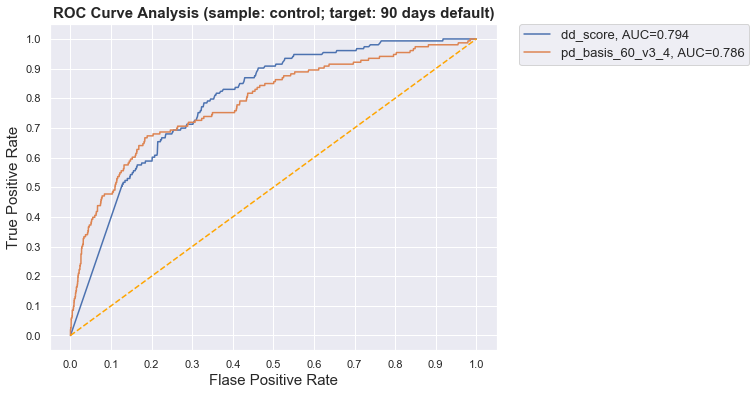

In [21]:
# OPENING QIWI AND DATADEV DATASET
qiwi = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/qiwi_exp_check_Gini.csv')
qiwi = qiwi[['ID', 'pd_basis_60_v3_4']]
dd = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/datadev/DataDev_credit_score.csv')
dd['dd_score'] = -dd['scoreNumber_7']
dd = dd[['applicationNumber', 'group_name', 'target_4_def_90_days', 'scoreNumber_7', 'dd_score']]

# MERGING TWO DATASETS TOGETHER
ddq = dd.merge(qiwi, left_on = 'applicationNumber', right_on = 'ID', how = 'left', suffixes = [None, '_2'])
df = ddq[ddq.scoreNumber_7 != 0]

# MERGING DATASET; REMOVING ROWS WITH NO VALUE FROM QIWI, RESETTING INDEX
df = df.reset_index()

# SPLITTING DATAFRAME INTO TEST AND CONTROL
df_test = df.loc[df.group_name == 'test']
df_test = df_test.reset_index()

df_control = df.loc[df.group_name == 'control']
df_control = df_control.reset_index()

# CREATING RESULT TABLE
result_table = pd.DataFrame(columns = ['y_pred', 'fpr', 'tpr', 'auc', 'gini'])

#CALCULATE ROC-AUC SCORE FOR TEST SAMPLE
for y_pred in ['dd_score', 'pd_basis_60_v3_4']:
    fpr,tpr,_ = roc_curve(df_control['target_4_def_90_days'].to_numpy(), df_control[y_pred].to_numpy())
    auc = roc_auc_score(df_control['target_4_def_90_days'], df_control[y_pred])
    gini = 2*auc-1
    result_table = result_table.append({'y_pred':y_pred,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc,
                                        'gini':gini}, ignore_index = True)
result_table.set_index('y_pred', inplace=True)
result_table

# PLOTTING THE FIGURE
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis (sample: control; target: 90 days default)', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# fig.savefig('C:/Users/sgulbin/Work/Analysis/Платежеспособность/QIWI_test/roc_curves/control_90_days_all_scores.png',\
#             bbox_inches = 'tight')

# plt.show()

## CALCULATING DATADEV ROC-AUC SCORE

In [92]:
dd = pd.read_csv('C:/Users/sgulbin/Work/Analysis/Платежеспособность/datadev/DataDev_credit_score.csv')
dd = dd[dd.scoreNumber_7 != 0]
dd['pred'] = np.where(dd.scoreNumber_7 < 796, 1, 0)

ras_number = roc_auc_score(dd['target_4_def_90_days'], dd['scoreNumber_7'])
ras_number_1_0 = roc_auc_score(dd['target_4_def_90_days'], dd['pred'])
print(1 - ras_number, 2*(1 - ras_number) - 1, ras_number_1_0, 2*ras_number_1_0 - 1)

0.7853691158947134 0.5707382317894267 0.7204583765246118 0.4409167530492235
